# Acquisition Function: exploration-exploitation tradeoff
## Author: Kim A. Nicoli

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from bayes_opt import BayesianOptimization


Bad key savefig.frameon in file C:\Users\ankad\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\ankad\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\ankad\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matplotlibrc fil

In [2]:
# Import custom font
import matplotlib.font_manager as fm

path_text = r'../fonts/Hero New Regular.otf' # for text only
path_abc = r'../fonts/Hero New Medium.otf' # for (a), (b), etc.
custom_font_text = fm.FontProperties(fname=path_text)
custom_font_abc = fm.FontProperties(fname=path_abc)

In [3]:
# Import colors (e.g., as 1D and dictionary)
import pickle

# Use colors as a dictionary
infile = open('../colors/colors_dict.pkl','rb')
colors_dict = pickle.load(infile)
infile.close()

# Import 1D array of colors
infile = open('../colors/colors_1D.pkl','rb')
colors_1D = pickle.load(infile)
infile.close()


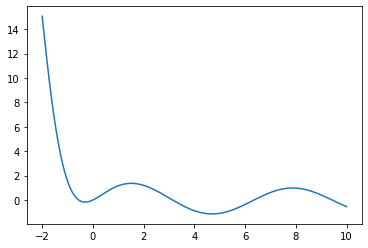

In [4]:
np.random.seed(42)
xs = np.linspace(-2, 10, 10000)

def f(x):
    return np.sin(x) + x**2 * np.cos(x/2) * np.exp(-x)
    #return np.exp(-(x - 2) ** 2) + np.exp(-(x - 6) ** 2 / 10) + 1/ (x ** 2 + 1)

plt.plot(xs, f(xs))
plt.show()

In [5]:
#utility function for plotting

def plot_bo(f, bo, ax=None, kappa=None):
    sns.set(style="whitegrid", rc={'figure.figsize':(5.25,3.375)}) # in inches
    sns.set_style("whitegrid", {'grid.linestyle': 'dashed', "grid.color": "0.5", 'axes.edgecolor': '.1'})


    x = np.linspace(-2, 10, 10000)
    mean, sigma = bo._gp.predict(x.reshape(-1, 1), return_std=True)
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(10, 7))
    ax.plot(x, f(x), color=colors_dict["blue"]["medium"], linewidth=3, linestyle='dashed', label='True function')
    ax.plot(x, mean, color=colors_dict["orange"]["medium"], linewidth=3, label='GP')
    ax.fill_between(x, mean + sigma, mean - sigma, color=colors_dict["orange"]["medium"],label='GP Confidence', alpha=0.3)
    ax.scatter(bo.space.params.flatten(), bo.space.target,label='Sampled points', color=colors_dict["purple"]["dark"], s=50, zorder=10)
    ax.set_xlabel(r'$x$', fontproperties=custom_font_text, fontsize=35)
    ax.grid()
    plt.setp(ax.get_xticklabels(), fontproperties=custom_font_text, fontsize=25)
    plt.setp(ax.get_yticklabels(), fontproperties=custom_font_text, fontsize=25)
    
    

'Hero New Medium.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'Hero New Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


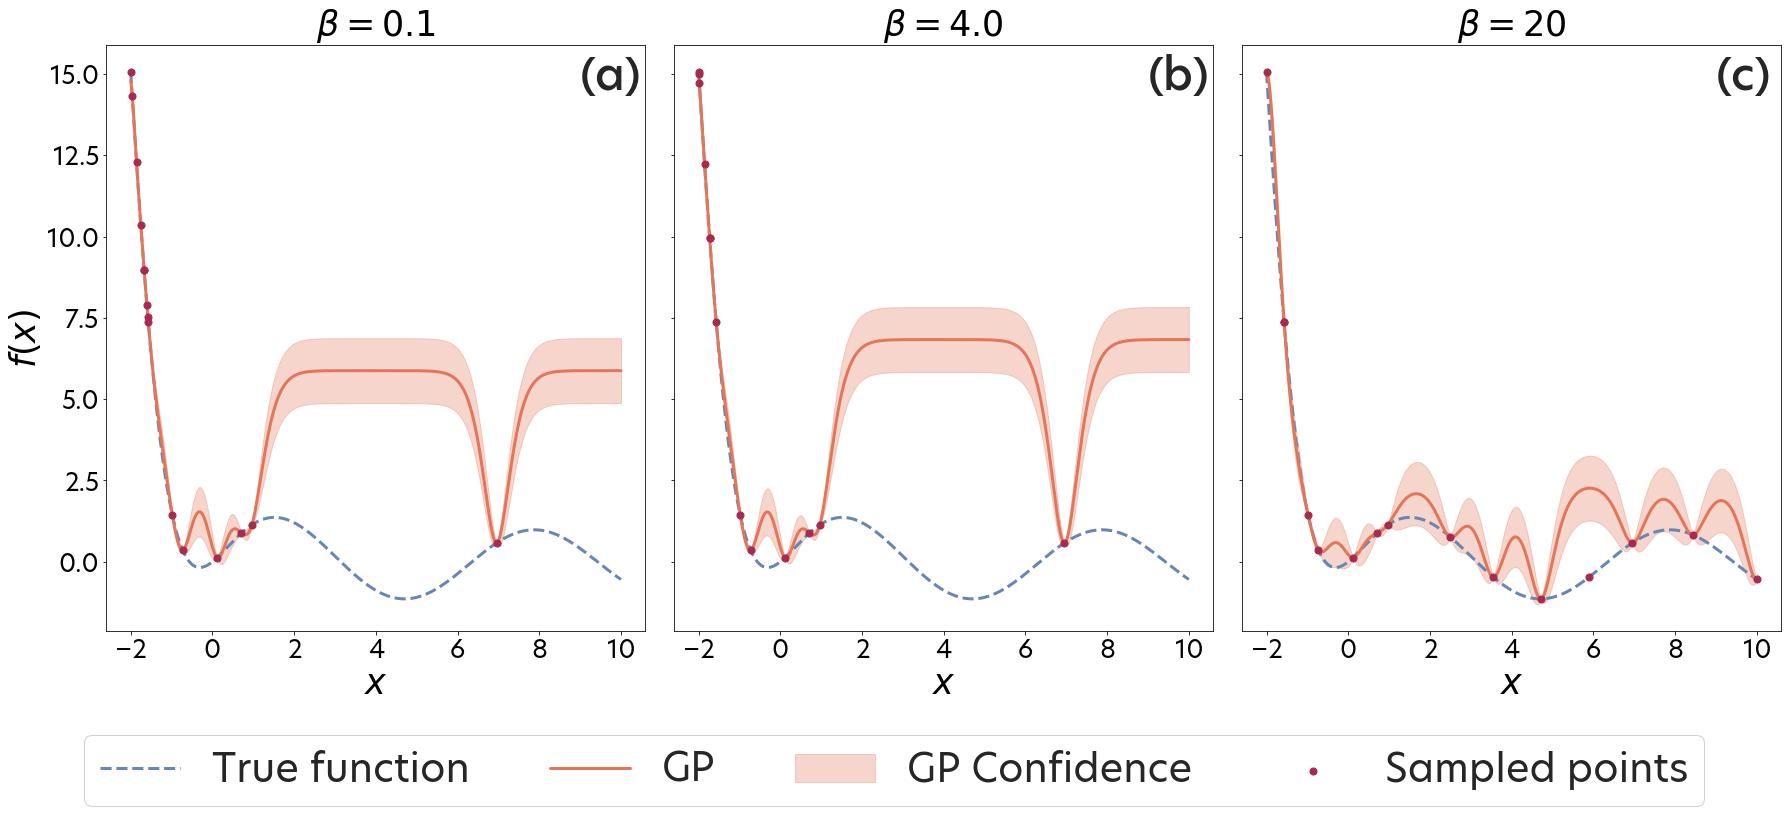

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,10), sharey=True)

bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)

bo.maximize(n_iter=10, acq="ucb", kappa=0.1)

plot_bo(f, bo, ax=ax1)

bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)

bo.maximize(n_iter=10, acq="ucb", kappa=4.0)

plot_bo(f, bo, ax=ax2)

bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)

bo.maximize(n_iter=10, acq="ucb", kappa=20)

plot_bo(f, bo, ax=ax3)

ax1.set_title(r'$\beta=0.1$',fontproperties=custom_font_text, fontsize=35)
ax2.set_title(r'$\beta=4.0$',fontproperties=custom_font_text, fontsize=35)
ax3.set_title(r'$\beta=20$',fontproperties=custom_font_text, fontsize=35)

ax1.set_ylabel(r'$f(x)$', fontproperties=custom_font_text, fontsize=35)


box = ax3.get_position()
ax3.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend below current axis
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

fig.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.001),
          framealpha = 0.9, ncol=4, prop=fm.FontProperties(fname=path_text, size=40)) #, fancybox=True, shadow=True, 
ax1.text(9., 14.5, "(a)", fontsize=45, fontproperties=custom_font_abc)
ax2.text(9., 14.5, "(b)", fontsize=45, fontproperties=custom_font_abc)
ax3.text(9., 14.5, "(c)", fontsize=45, fontproperties=custom_font_abc)
ax1.grid()
ax2.grid()
ax3.grid()
plt.tight_layout()

#plt.show()

fig.savefig('figure4.6.pdf', bbox_inches='tight')